In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Import Dataset

In [89]:
df = pd.read_csv("data.csv", sep = '\t')

In [90]:
df.shape

(39775, 172)

# Testing Purposes

In [91]:
onehotencoded = True

# Data Pre-Processing

In [92]:
depression = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']


df['Total'] = df[depression].sum(axis=1)


df = df.drop(df.columns[np.arange(3*42)], axis = 1).drop("major", axis = 1)

In [93]:
validityChecks = ['VCL6', 'VCL9', 'VCL12']
for check in validityChecks:
    indexNames = df[ df[check] == 1 ].index
    df.drop(indexNames , inplace=True)

In [94]:
s = []
for i in df.columns:
    if type(df[i].iloc[0]) is not str:
        s.append(i)
    if type(df[i].iloc[0]) is str:
        df = df.drop([i], axis = 1)

In [95]:
df = df.drop(['source', 'introelapse', 'testelapse', 'surveyelapse', 'screensize', 'uniquenetworklocation'], axis = 1)

In [96]:
df = df.drop(df.columns[10:26], axis = 1)

In [97]:
df.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,engnat,age,hand,religion,orientation,race,voted,married,familysize,Total
0,1,5,7,7,7,7,7,5,1,1,...,2,16,1,12,1,10,2,1,2,41
1,6,5,4,7,5,4,7,7,1,5,...,1,16,2,7,0,70,2,1,4,38
2,2,5,2,2,5,6,5,5,3,2,...,2,17,1,4,3,60,1,1,3,53
3,1,1,7,4,6,4,6,1,6,1,...,1,13,2,4,5,70,2,1,5,30
4,2,5,3,6,5,5,5,6,3,3,...,2,19,3,10,1,10,2,1,4,46


In [98]:
df = df.drop(df.columns[10:22], axis = 1)

# Pre-Processed Data Set

In [99]:
df.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Total
0,1,5,7,7,7,7,7,5,1,1,41
1,6,5,4,7,5,4,7,7,1,5,38
2,2,5,2,2,5,6,5,5,3,2,53
3,1,1,7,4,6,4,6,1,6,1,30
4,2,5,3,6,5,5,5,6,3,3,46


# Data Visualizations

In [58]:
# Helps with visualizing the Mean Total against each column
def graphMeans(column):
    means = df.groupby([column]).mean()
    #sns.barplot(x = means.index.values, y = 'Total', data = means)
    lp = sns.lineplot(x = means.index.values, y = 'Total', data = means)
    plt.ylim(0,56)
    lp.set(xlabel = "Response")
    plt.title(column + " vs. Depression Score")

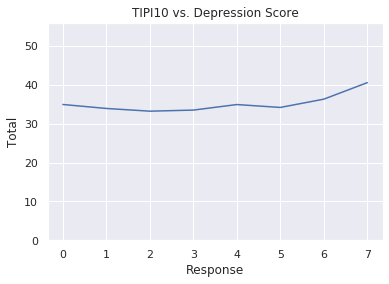

In [59]:
graphMeans('TIPI10')

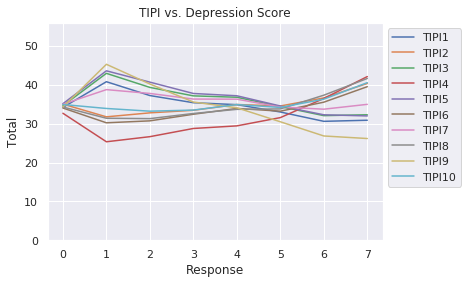

In [60]:
for s in df.columns[:-1]:
    means = df.groupby([s]).mean()
    vis = sns.lineplot(x = means.index.values, y = 'Total', data = means)
    plt.ylim(0,56)
    vis.set(xlabel = "Response")
plt.title("TIPI vs. Depression Score")
plt.legend(labels=['TIPI1', 'TIPI2', 'TIPI3','TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'], bbox_to_anchor=(1, 1))

# One-Hot Encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [62]:
encodingColumns = np.arange(0,len(df.columns) - 1)
onehotencoder = OneHotEncoder(categorical_features = encodingColumns) 
data = onehotencoder.fit_transform(df).toarray()
dfOHE = pd.DataFrame(data)
OHEColumns = np.array(onehotencoder.get_feature_names(df.columns[0:len(df.columns) - 1]))
OHEColumns = np.append(OHEColumns, 'Total')
dfOHE.columns = OHEColumns

/srv/app/venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/srv/app/venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Drop First Column

In [63]:
numOnes = np.array(['TIPI1_0.0', 'TIPI2_0.0', 'TIPI3_0.0', 'TIPI4_0.0', 'TIPI5_0.0',
       'TIPI6_0.0', 'TIPI7_0.0', 'TIPI8_0.0', 'TIPI9_0.0',
       'TIPI10_0.0'])
dfOHE = dfOHE.drop(numOnes, axis = 1)

# One Hot Encoded Dataset

In [64]:
dfOHE.head()

,TIPI1_1.0,TIPI1_2.0,TIPI1_3.0,TIPI1_4.0,TIPI1_5.0,TIPI1_6.0,TIPI1_7.0,TIPI2_1.0,TIPI2_2.0,TIPI2_3.0,...,TIPI9_6.0,TIPI9_7.0,TIPI10_1.0,TIPI10_2.0,TIPI10_3.0,TIPI10_4.0,TIPI10_5.0,TIPI10_6.0,TIPI10_7.0,Total
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46.0


# Test-Training Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
if(onehotencoded):
    features = dfOHE.columns[0:len(dfOHE.columns) - 1]
    X = pd.DataFrame(dfOHE[features])
    y = pd.DataFrame(dfOHE.Total)
else:
    features = df.columns[0:len(df.columns) - 1]
    X = pd.DataFrame(df[features])
    y = pd.DataFrame(df.Total)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Importance

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Train Random Forest Regressor

In [69]:
rf = RandomForestRegressor() 
rf.fit(X_train, y_train) 

/srv/app/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
featuresColumn = np.array(X_train.columns)
importanceColumn = np.array(rf.feature_importances_)
featureDict = {'Features': featuresColumn, 'Importance': importanceColumn}

fI = pd.DataFrame.from_dict(featureDict).sort_values('Importance', ascending=False)
fI.head()

,Features,Importance
27,TIPI4_7.0,0.143289
26,TIPI4_6.0,0.051790
56,TIPI9_1.0,0.044492
57,TIPI9_2.0,0.027949
41,TIPI6_7.0,0.021118


In [71]:
columns = np.array(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'])
vals = np.zeros(10)
d = {}
for A, B in zip(columns, vals):
    d[A] = B
for i in np.arange(len(fI.Features)):
    name = fI.iloc[i,0]
    if 'TIPI1' in name:
        d['TIPI1'] = d.get('TIPI1') + fI.iloc[i,1]
    if 'TIPI2' in name:
        d['TIPI2'] = d.get('TIPI2') + fI.iloc[i,1]
    if 'TIPI3' in name:
        d['TIPI3'] = d.get('TIPI3') + fI.iloc[i,1]
    if 'TIPI4' in name:
        d['TIPI4'] = d.get('TIPI4') + fI.iloc[i,1]
    if 'TIPI5' in name:
        d['TIPI5'] = d.get('TIPI5') + fI.iloc[i,1]
    if 'TIPI6' in name:
        d['TIPI6'] = d.get('TIPI6') + fI.iloc[i,1]
    if 'TIPI7' in name:
        d['TIPI7'] = d.get('TIPI7') + fI.iloc[i,1]
    if 'TIPI8' in name:
        d['TIPI8'] = d.get('TIPI8') + fI.iloc[i,1]
    if 'TIPI9' in name:
        d['TIPI9'] = d.get('TIPI9') + fI.iloc[i,1]
    if 'TIPI10' in name:
        d['TIPI10'] = d.get('TIPI10') + fI.iloc[i,1]
        
extraversion = d['TIPI1'] + d['TIPI6']
agreeableness = d['TIPI2'] + d['TIPI7']
conscientiousness = d['TIPI3'] + d['TIPI8']
neuroticism = d['TIPI4'] + d['TIPI9']
openness = d['TIPI5'] + d['TIPI10']
traitDict = {'Traits': ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'], 
               'Importance': [extraversion, agreeableness, conscientiousness, neuroticism, openness]}
tI = pd.DataFrame(data = traitDict).sort_values('Importance', ascending=False)
tI

,Traits,Importance
3,Neuroticism,0.355062
0,Extraversion,0.246252
4,Openness,0.163262
2,Conscientiousness,0.162115
1,Agreeableness,0.159692


## For Without OHE

In [72]:
#extraversion = fI.loc[fI['Features'] == 'TIPI1'].iloc[0]['Importance'] + fI.loc[fI['Features'] == 'TIPI6'].iloc[0]['Importance']
#agreeableness = fI.loc[fI['Features'] == 'TIPI2'].iloc[0]['Importance'] + fI.loc[fI['Features'] == 'TIPI7'].iloc[0]['Importance']
#conscientiousness = fI.loc[fI['Features'] == 'TIPI3'].iloc[0]['Importance'] + fI.loc[fI['Features'] == 'TIPI8'].iloc[0]['Importance']
#neuroticism = fI.loc[fI['Features'] == 'TIPI4'].iloc[0]['Importance'] + fI.loc[fI['Features'] == 'TIPI9'].iloc[0]['Importance']
#openness = fI.loc[fI['Features'] == 'TIPI5'].iloc[0]['Importance'] + fI.loc[fI['Features'] == 'TIPI10'].iloc[0]['Importance']
#traitDict = {'Traits': ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'], 
               #'Importance': [extraversion, agreeableness, conscientiousness, neuroticism, openness]}
#tI = pd.DataFrame(data = traitDict).sort_values('Importance', ascending=False)
#tI

In [73]:
y_pred = rf.predict(X_test)

In [74]:
print("R-squared value on Training Set:", rf.score(X_train, y_train))
print("R-squared value on Testing Set:", rf.score(X_test, y_test))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)

R-squared value on Training Set: 0.8654594378640061
R-squared value on Testing Set: 0.24812667133214938
RMSE: 10.639666406242897


# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

In [77]:
print("R-squared value on Training Set:", lr.score(X_train, y_train))
print("R-squared value on Test Set:", lr.score(X_test, y_test))
print("RMSE:", mean_squared_error(y_test, y_predlr) ** 0.5)

R-squared value on Training Set: 0.3776480704523476
R-squared value on Test Set: 0.35807399606535184
RMSE: 9.831010416041154


In [78]:
lr.score(X_train, y_train)

0.3776480704523476

In [79]:
lr.score(X_test, y_test)

0.35807399606535184

In [80]:
mean_squared_error(y_test, y_predlr) ** 0.5

9.831010416041154

In [81]:
fCol = np.array(X_train.columns)
importanceCol = np.array(lr.coef_[0])
featureDict = {'Features': fCol, 'Importance': importanceCol}

fILR = pd.DataFrame.from_dict(featureDict)#.sort_values('Importance', ascending=False)

In [82]:
TIPI1 = sum(lr.coef_[0][0:7])
TIPI2 = abs(sum(lr.coef_[0][7:14]))
TIPI3 = abs(sum(lr.coef_[0][14:21]))
TIPI4 = abs(sum(lr.coef_[0][21:28]))
TIPI5 = abs(sum(lr.coef_[0][28:35]))
TIPI6 = abs(sum(lr.coef_[0][35:42]))
TIPI7 = abs(sum(lr.coef_[0][42:49]))
TIPI8 = abs(sum(lr.coef_[0][49:56]))
TIPI9 = abs(sum(lr.coef_[0][56:63]))
TIPI10 = abs(sum(lr.coef_[0][63:70]))


In [83]:
print("Extraversion", TIPI1 + TIPI6)
print("Agreeableness", TIPI2 + TIPI7)
print("Conscientiousness", TIPI3 + TIPI8)
print("Neuroticism", TIPI4 + TIPI9)
print("Openness", TIPI5 + TIPI10)

Extraversion 13.52213760545461
Agreeableness 6.549211486348733
Conscientiousness 14.780219742587406
Neuroticism 14.536955525597765
Openness 15.444442754638434


In [84]:
extraLR = TIPI1 + TIPI6
agreeLR = TIPI2 + TIPI7
conLR = TIPI3 + TIPI8
neuLR = TIPI4 + TIPI9
openLR = TIPI5 + TIPI10

traits = np.array(["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"])
importance = np.array([extraLR, agreeLR, conLR, neuLR, openLR])
featureDict = {'Traits': traits, 'Importance': importance}
fILR = pd.DataFrame.from_dict(featureDict).sort_values('Importance', ascending=False)
fILR

,Traits,Importance
4,Openness,15.444443
2,Conscientiousness,14.780220
3,Neuroticism,14.536956
0,Extraversion,13.522138
1,Agreeableness,6.549211


# Widget Visualizer

In [85]:
import ipywidgets as ipw
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox, Label
import numpy as np

In [87]:
s1 = ipw.IntSlider(min = 0, max = 7)
s2 = ipw.IntSlider(min = 0, max = 7)
s3 = ipw.IntSlider(min = 0, max = 7)
s4 = ipw.IntSlider(min = 0, max = 7)
s5 = ipw.IntSlider(min = 0, max = 7)
s6 = ipw.IntSlider(min = 0, max = 7)
s7 = ipw.IntSlider(min = 0, max = 7)
s8 = ipw.IntSlider(min = 0, max = 7)
s9 = ipw.IntSlider(min = 0, max = 7)
s10 = ipw.IntSlider(min = 0, max = 7)

q1 = HBox([Label('Extraverted, Enthusiastic'), s1])
q2 = HBox([Label('Critical, quarrelsome'), s2])
q3 = HBox([Label('Dependable, self-disciplined'), s3])
q4 = HBox([Label('Anxious, easily upset'), s4])
q5 = HBox([Label('Open to new experiences, complex'), s5])
q6 = HBox([Label('Reserved, quiet'), s6])
q7 = HBox([Label('Sympathetic, warm'), s7])
q8 = HBox([Label('Disorganized, careless'), s8])
q9 = HBox([Label('Calm, emotionally stable'), s9])
q10 = HBox([Label('Conventional, uncreative'), s10])

ui = ipw.VBox([q1, q2, q3, q4, q5, q6, q7, q8, q9, q10])
def OHE(values):
    encoded = np.zeros(70)
    q = 0
    for i in values:
        if (i != 0):
            encoded[7*q+i-1] = 1
            q += 1
    return encoded.T
        
def f(q1, q2, q3, q4, q5, q6, q7, q8, q9, q10):
    values = np.array([q1, q2, q3, q4, q5, q6, q7, q8, q9, q10])
    if(onehotencoded):
        X_input = OHE(values).reshape(1,-1)
    else: 
        X_input = values.reshape(1,-1)
    prediction = lr.predict(X_input)
    print(prediction)
    bar = ipw.FloatProgress(
    value=prediction,
    min=0,
    max=56,
    step=0.1,
    description='Severity:',
    bar_style='info',
    orientation='vertical')
    display(bar)
    
out = ipw.interactive_output(f, {'q1': s1, 'q2': s2, 'q3': s3, 'q4': s4, 'q5': s5, 'q6': s6, 'q7': s7, 'q8': s8, 'q9': s9, 'q10': s10})

display(ui, out)

Output()